In [2]:
import pandas as pd

In [78]:
data = pd.read_csv('/kaggle/input/preterm-data-set/preterm.csv')

In [79]:
data.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [6]:
data.isnull().sum()

Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB
None


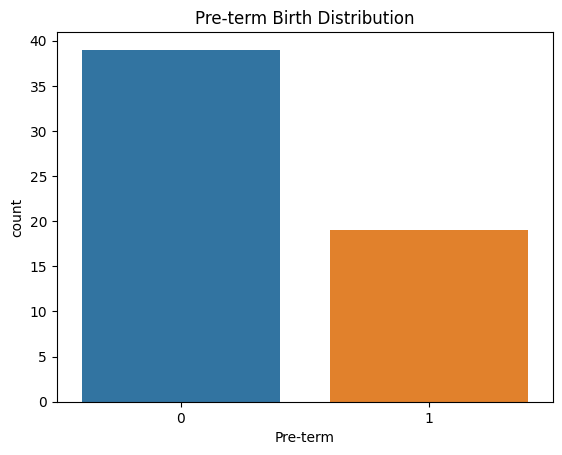

Pre-term
0    0.672414
1    0.327586
Name: proportion, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# target variable
sns.countplot(x=data['Pre-term'])
plt.title("Pre-term Birth Distribution")
plt.show()

print(data['Pre-term'].value_counts(normalize=True))

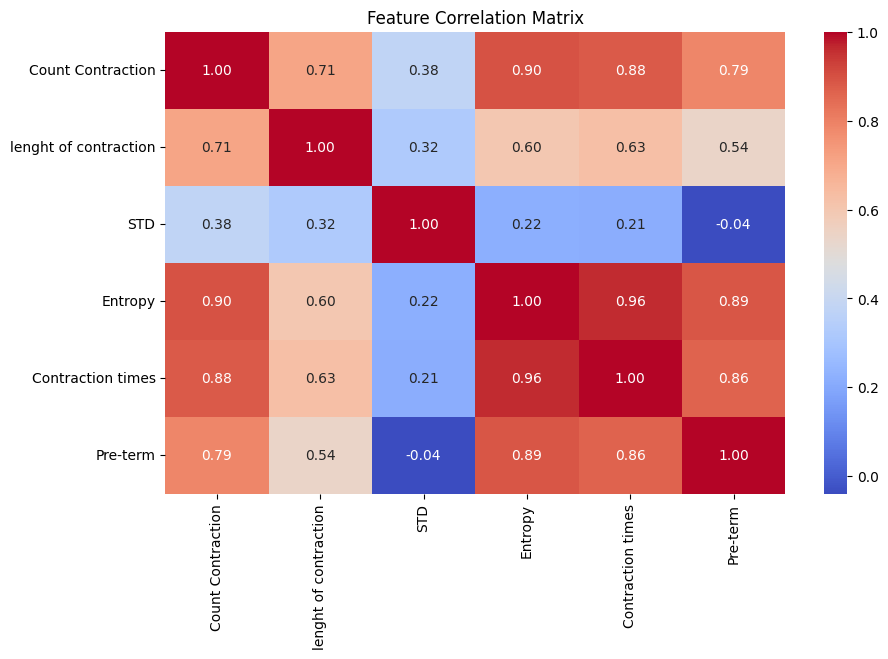

In [11]:
import numpy as np

# correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

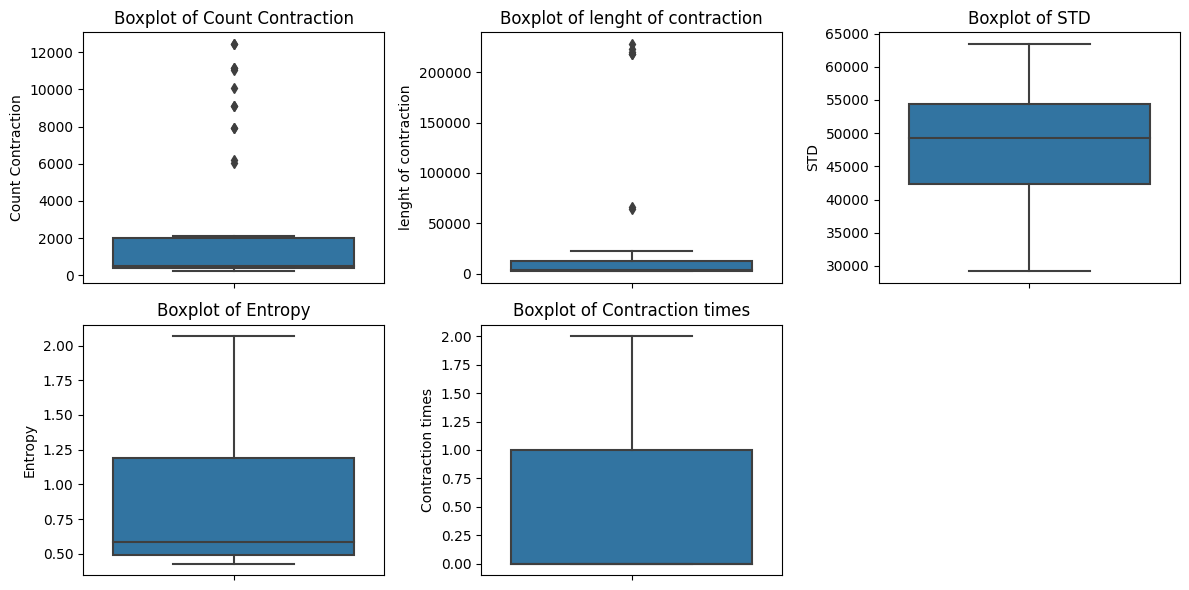

In [12]:
# Box Plot
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
nn_model.add(Dense(32, activation='relu')) 
nn_model.add(Dense(1, activation='sigmoid'))  

nn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the neural network
nn_model.fit(X_train, Y_train, epochs=45, batch_size=16, validation_data=(X_test, Y_test), verbose=0)

nn_accuracy = nn_model.evaluate(X_test, Y_test, verbose=0)[1]

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.9444


In [93]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_columns = ['Entropy', 'Contraction times', 'Count Contraction', 'lenght of contraction', 'STD']
Y_columns = ['Pre-term']

X = data[X_columns]
Y = data[Y_columns]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values.reshape(-1), test_size=0.3, random_state=1)

# Logistic Regression
l1 = LogisticRegression(penalty="l1", C=3, solver="liblinear")
l1.fit(X_train, Y_train)
l1_accuracy = l1.score(X_test, Y_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, Y_train)
svm_accuracy = svm.score(X_test, Y_test)


print(f"Logistic Regression Accuracy: {l1_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

Logistic Regression Accuracy: 0.9444
SVM Accuracy: 0.8889


In [94]:
nn_model.save("preterm_nopreterm.h5")  

In [96]:
from tensorflow.keras.models import load_model

loaded_model = load_model("preterm_nopreterm.h5")

loaded_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.77 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)